# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

### 1. Carga de datos

In [906]:
#incluimos los módulos y sub módulos que vamos a usar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [907]:
h = pd.read_csv("hospitalizacion.csv")

In [908]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                420 non-null    int64  
 1   EDAD                      420 non-null    float64
 2   PSA                       420 non-null    float64
 3   DIAS_HOSPITALIZACION_MQ   420 non-null    float64
 4   DIAS_HOSPITALIZACION_UPC  420 non-null    float64
 5   AGENTE_AISLADO_N          420 non-null    float64
 6   HOSPITALIZACION_N         420 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.1 KB


`DONDE: HOSPITALIZACION_N: 'SI':0, 'NO':1 `

In [909]:
#Importamos las herramientas que vamos a utilizar.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [910]:
x = h['EDAD']

In [911]:
x = np.array(x)

In [912]:
x = x.reshape(-1,1)

In [913]:
h['HOSPITALIZACION_N'] = h['HOSPITALIZACION_N'].replace({'SI': 0, 'NO': 1}).astype(int)

In [914]:
y = h['HOSPITALIZACION_N']

In [915]:
y = np.array(y)

In [916]:
y = y.reshape(-1,1)

Separen el dataset en X, y (variable objetivo)

In [917]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 2.- Árbol de Decisión

In [918]:
clf = DecisionTreeClassifier()

In [919]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [920]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf.predict(x_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf.predict(x_test)

Graficamos

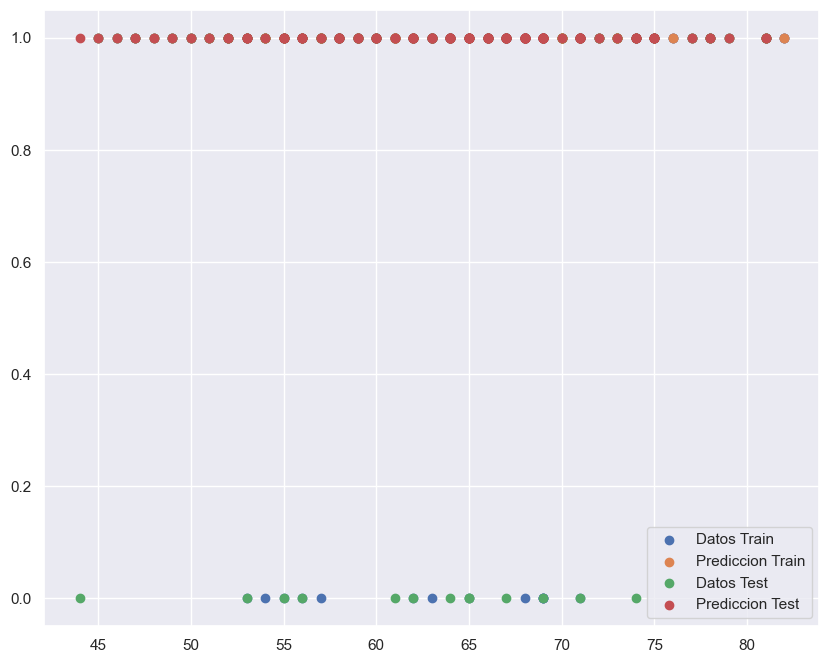

In [921]:
plt.figure(figsize = (10,8))

plt.scatter(x_train, y_train, label = 'Datos Train')
plt.scatter(x_train, y_train_pred, label = 'Prediccion Train')

plt.scatter(x_test, y_test, label = 'Datos Test')
plt.scatter(x_test, y_test_pred, label = 'Prediccion Test')

plt.legend()
plt.show()

### 3.- Métricas


Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [922]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.04421768707482993
Error en datos de test: 0.10317460317460317


In [923]:
# Calcular la EXACTITUD del modelo: La exactitud mide la frecuencia con la que el modelo es correcto.
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 0.10317460317460317


In [924]:
# Comparamos 
print('Exactitud sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Exactitud sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Exactitud sobre conjunto de Train: 0.95578231292517
Exactitud sobre conjunto de Test: 0.8968253968253969


In [925]:
# Calcular la PRECISION del modelo: De los positivos previstos, ¿qué porcentaje es realmente positivo?
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.010644998740236835


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [926]:
#Calcular la SENSIBILIDAD: De todos los casos positivos, ¿qué porcentaje se pronostican positivos?
Sensitivity_recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad:", Sensitivity_recall)

Sensibilidad: 0.10317460317460317


In [927]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)

In [928]:
print(confusion_matrix)

[[  0  13]
 [  0 281]]


In [929]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

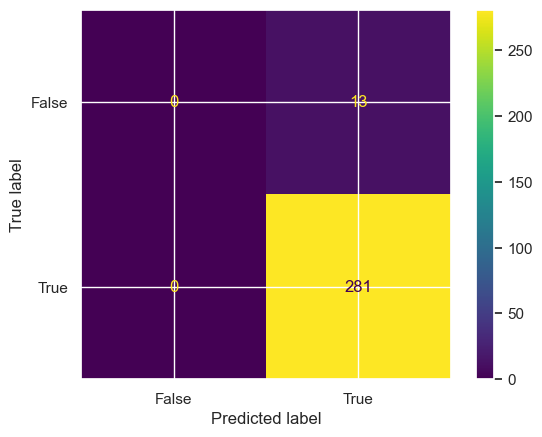

In [930]:
cm_display.plot()
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

### 4.- Optimización

In [931]:
espacio_de_parametros = {
  "max_depth" : [3, 5],
#  "min_samples_split" : x,
#  "min_samples_leaf" : y,
  "criterion" : ["gini", "entropy"]
}

In [932]:
modelo_arbol = DecisionTreeClassifier()

clf = GridSearchCV(modelo_arbol, espacio_de_parametros, cv=5, return_train_score=True, scoring = 'accuracy')
search = clf.fit(x, y)
results_GridSearchCV = search.cv_results_
indice_mejores_parametros = search.best_index_

In [933]:
results_GridSearchCV['params'][indice_mejores_parametros]

{'criterion': 'gini', 'max_depth': 3}

### 5.- K-Vecinos

In [934]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 10
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [935]:
y_train_pred_knn = rgr_knn.predict(x_train)
y_test_pred_knn = rgr_knn.predict(x_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Error en datos de train: 0.03972789115646259
Error en datos de test: 0.09746031746031746


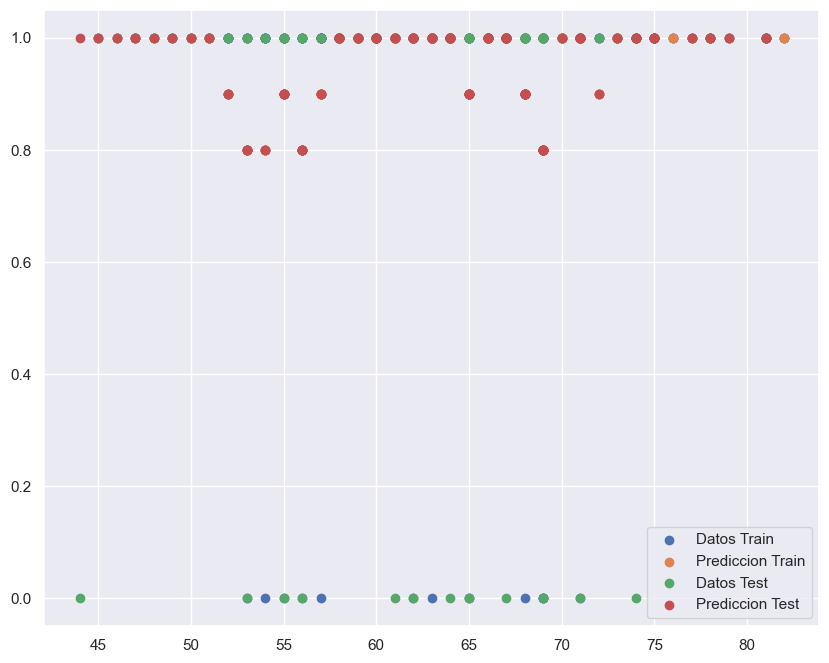

In [936]:
plt.figure(figsize = (10,8))

plt.scatter(x_train, y_train, label = 'Datos Train')
plt.scatter(x_train, y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(x_test, y_test, label = 'Datos Test')
plt.scatter(x_test, y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

### 6.- Métricas

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [937]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.04421768707482993
Error en datos de test: 0.10317460317460317


In [938]:
# Calcular la EXACTITUD del modelo: La exactitud mide la frecuencia con la que el modelo es correcto.
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 0.10317460317460317


In [939]:
# Comparamos 
print('Exactitud sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Exactitud sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Exactitud sobre conjunto de Train: 0.95578231292517
Exactitud sobre conjunto de Test: 0.8968253968253969


In [940]:
# Calcular la PRECISION del modelo: De los positivos previstos, ¿qué porcentaje es realmente positivo?
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.010644998740236835


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [941]:
#Calcular la SENSIBILIDAD: De todos los casos positivos, ¿qué porcentaje se pronostican positivos?
Sensitivity_recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Sensibilidad:", Sensitivity_recall)

Sensibilidad: 0.10317460317460317


### 7.- Optimización

Encuentre el valor óptimo para k. Para esto, debemos evaluar el accuracy del modelo en el set de evaluación para distintos valores del parámetro `k`. Vamos entonces a repetir el esquema de: **definir, entrenar y predecir** en un loop `for` que recorre una lista con distintos valores de `k`.

In [942]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(x_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

* Realizamos un gráfico que muestre la curvas de accuracy en el set de entrenamiento (`lista_accuracy_train`) y accuracy en el set de entrenamiento (`lista_accuracy_test`) en función del numero de vecinos (`k_vecinos`).

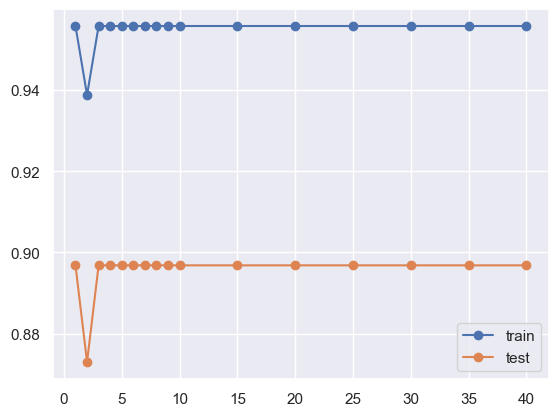

In [943]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

### 8.- Conclusión del modelado.

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo?

R/ Se debe utilizar un max_depth 3 en el modelo Árbol de Decisión. En el modelo K VEcinos la exactitud es mayor en el grupo de prueba. 